In [1]:
#load required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
plt.style.use("seaborn-colorblind")
pal = sns.color_palette()

In [2]:
#load dataset
df= pd.read_csv('delay_flight.csv')

In [3]:
#view dataset
df.head()

,Unnamed: 0,Airline,Origin,Dest,Cancelled,Diverted,DepDelayMinutes,ArrDelayMinutes,AirTime,CRSElapsedTime,...,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,TaxiIn,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,0,Endeavor Air Inc.,ABY,ATL,False,False,0.0,0.0,38.0,62.0,...,False,0,1200-1259,14.0,7.0,False,0,1300-1359,1,0
1,1,Endeavor Air Inc.,ABY,ATL,False,False,0.0,0.0,36.0,62.0,...,False,0,1200-1259,13.0,12.0,False,0,1300-1359,1,0
2,2,Endeavor Air Inc.,ABY,ATL,False,False,0.0,0.0,40.0,62.0,...,False,0,1200-1259,18.0,11.0,False,0,1300-1359,1,0
3,3,Endeavor Air Inc.,ABY,ATL,False,False,0.0,0.0,35.0,62.0,...,False,0,1200-1259,17.0,11.0,False,0,1300-1359,1,0
4,4,Endeavor Air Inc.,ABY,ATL,False,False,0.0,0.0,36.0,60.0,...,False,0,1400-1459,17.0,11.0,False,0,1500-1559,1,0


In [4]:
#basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028538 entries, 0 to 1028537
Data columns (total 32 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1028538 non-null  int64  
 1   Airline               1028538 non-null  object 
 2   Origin                1028538 non-null  object 
 3   Dest                  1028538 non-null  object 
 4   Cancelled             1028538 non-null  bool   
 5   Diverted              1028538 non-null  bool   
 6   DepDelayMinutes       1028538 non-null  float64
 7   ArrDelayMinutes       1028538 non-null  float64
 8   AirTime               1028538 non-null  float64
 9   CRSElapsedTime        1028538 non-null  float64
 10  ActualElapsedTime     1028538 non-null  float64
 11  Distance              1028538 non-null  float64
 12  Quarter               1028538 non-null  int64  
 13  Month                 1028538 non-null  int64  
 14  DayofMonth            1028538 non-

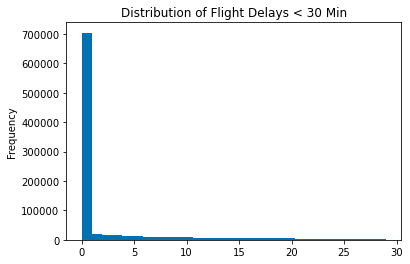

In [5]:
df.query("DepDelayMinutes < 30")["DepDelayMinutes"].plot(
    kind="hist", bins=30, title="Distribution of Flight Delays < 30 Min"
)
plt.show()

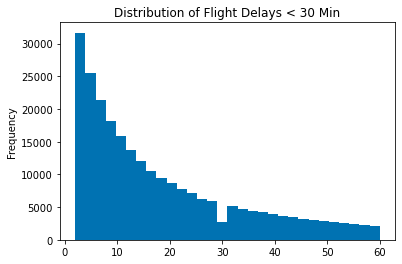

In [7]:
df.query("DepDelayMinutes > 1 and DepDelayMinutes < 61")["DepDelayMinutes"].plot(
    kind="hist", bins=30, title="Distribution of Flight Delays < 30 Min"
)
plt.show()

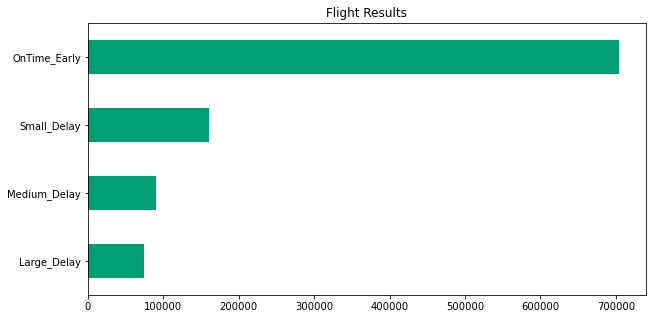

In [6]:
df["DelayGroup"] = None
df.loc[df["DepDelayMinutes"] == 0, "DelayGroup"] = "OnTime_Early"
df.loc[
    (df["DepDelayMinutes"] > 0) & (df["DepDelayMinutes"] <= 15), "DelayGroup"
] = "Small_Delay"
df.loc[
    (df["DepDelayMinutes"] > 15) & (df["DepDelayMinutes"] <= 45), "DelayGroup"
] = "Medium_Delay"
df.loc[df["DepDelayMinutes"] > 45, "DelayGroup"] = "Large_Delay"
df.loc[df["Cancelled"], "DelayGroup"] = "Cancelled"


df["DelayGroup"].value_counts(ascending=True).plot(
    kind="barh", figsize=(10, 5), color=pal[1], title="Flight Results"
)
plt.show()

Text(0.5, 0, 'Flights (100k)')

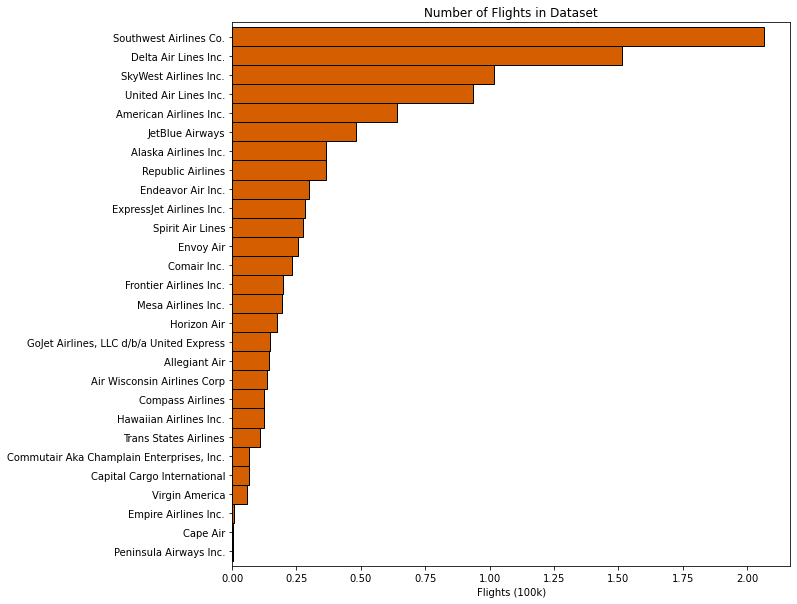

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
airlines_ordered = (df["Airline"].value_counts(ascending=True) / 100_000).plot(
    kind="barh", ax=ax, color=pal[2], width=1, edgecolor="black"
)
ax.set_title("Number of Flights in Dataset")
ax.set_xlabel("Flights (100k)")

# DEPARTURE DELAYS BY AIRLINE

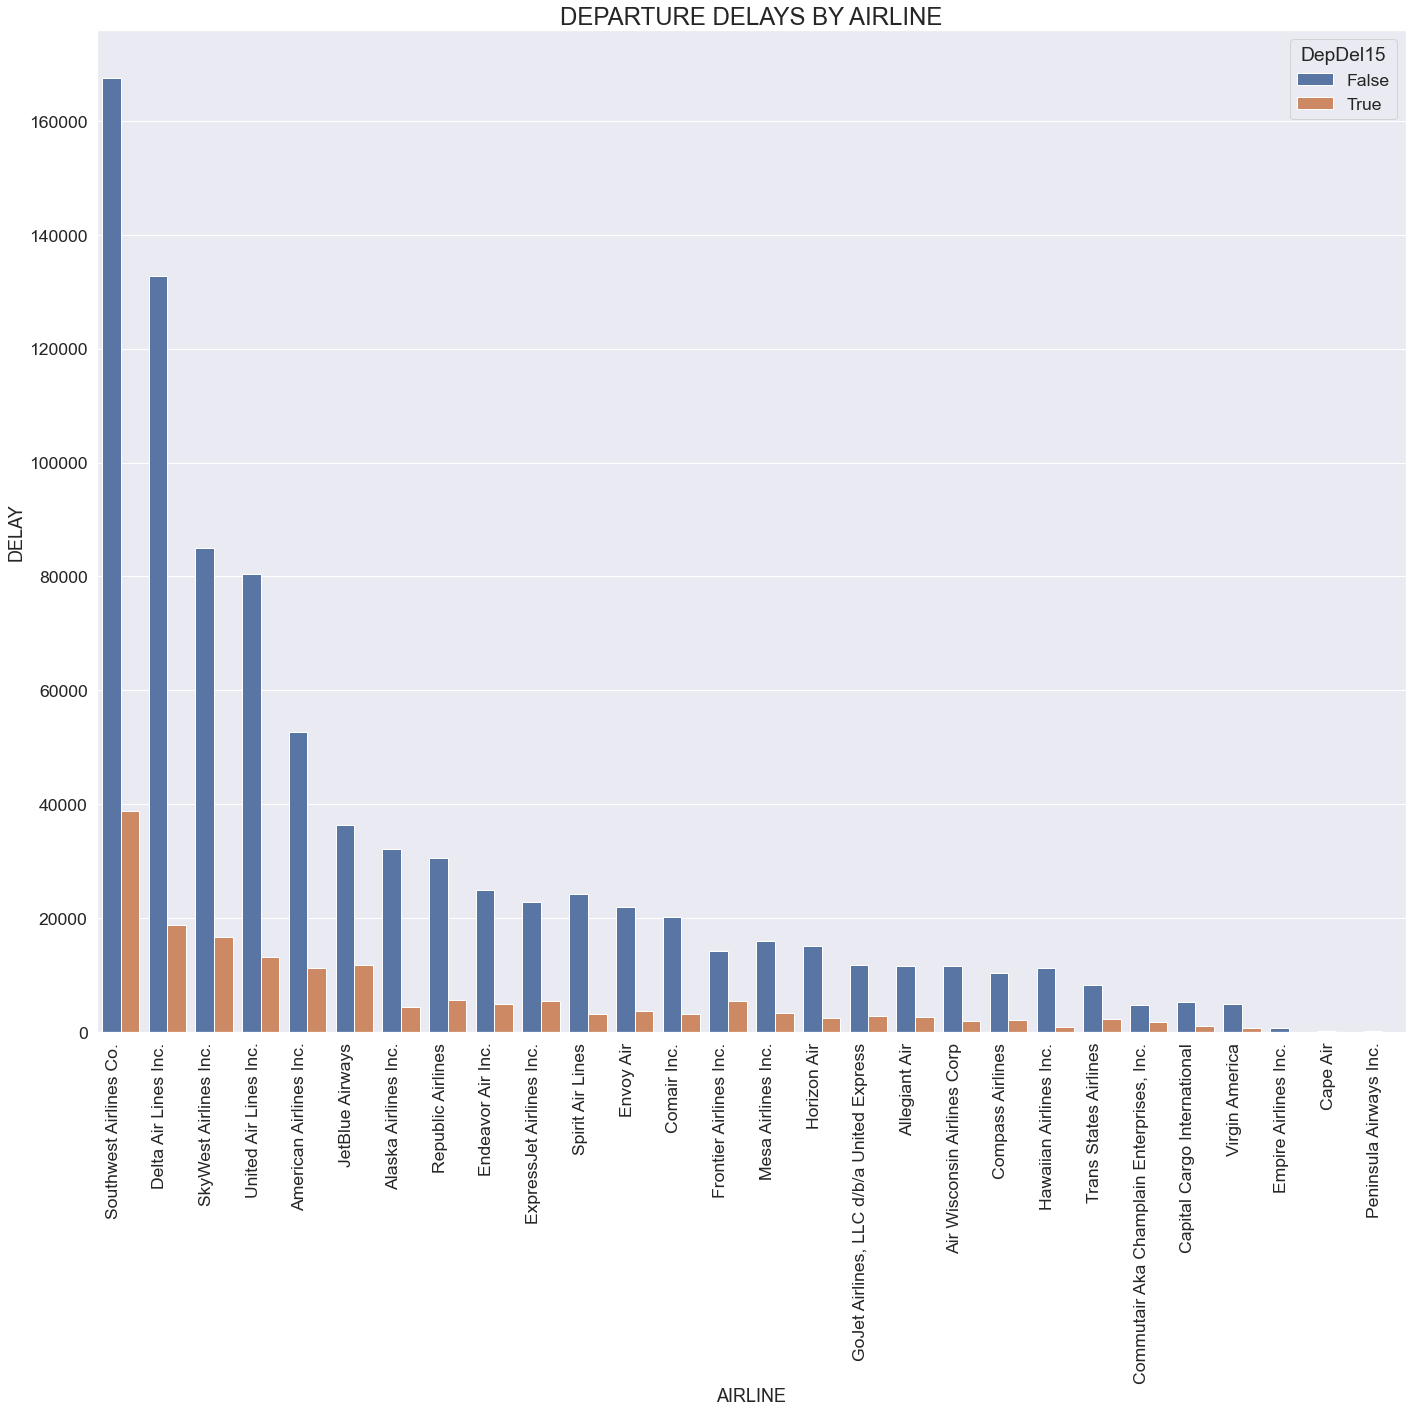

In [8]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.6)
axis = sns.countplot(x='Airline',hue='DepDel15', data=df, order=df['Airline'].value_counts().iloc[0:29].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('DEPARTURE DELAYS BY AIRLINE', fontsize=24)
plt.xlabel('AIRLINE', fontsize=18)
plt.ylabel('DELAY', fontsize=18)
plt.tight_layout()
plt.show()

# ARRIVAL DELAYS BY AIRLINE

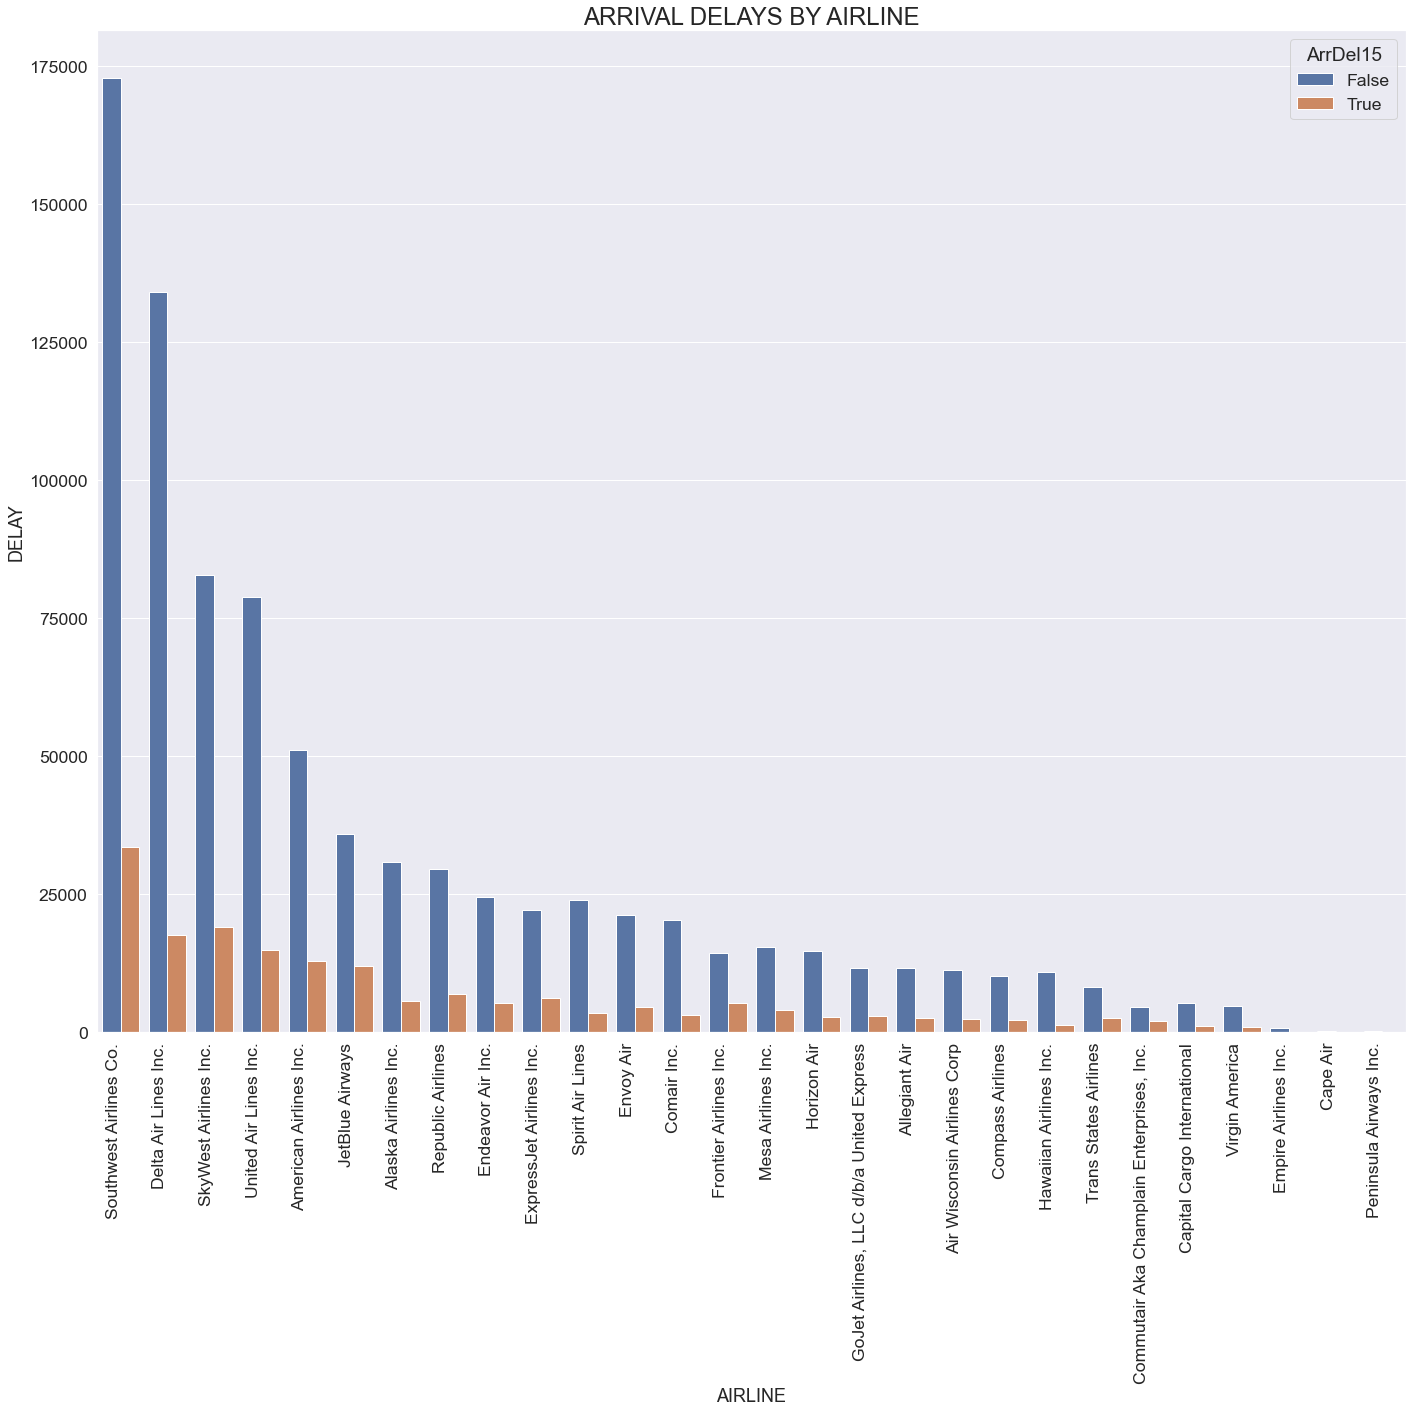

In [9]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.6)
axis = sns.countplot(x='Airline',hue='ArrDel15', data=df, order=df['Airline'].value_counts().iloc[0:29].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('ARRIVAL DELAYS BY AIRLINE', fontsize=24)
plt.xlabel('AIRLINE', fontsize=18)
plt.ylabel('DELAY', fontsize=18)
plt.tight_layout()
plt.show()

# ARRIVAL DELAYS TIME BY DAYS OF WEEK

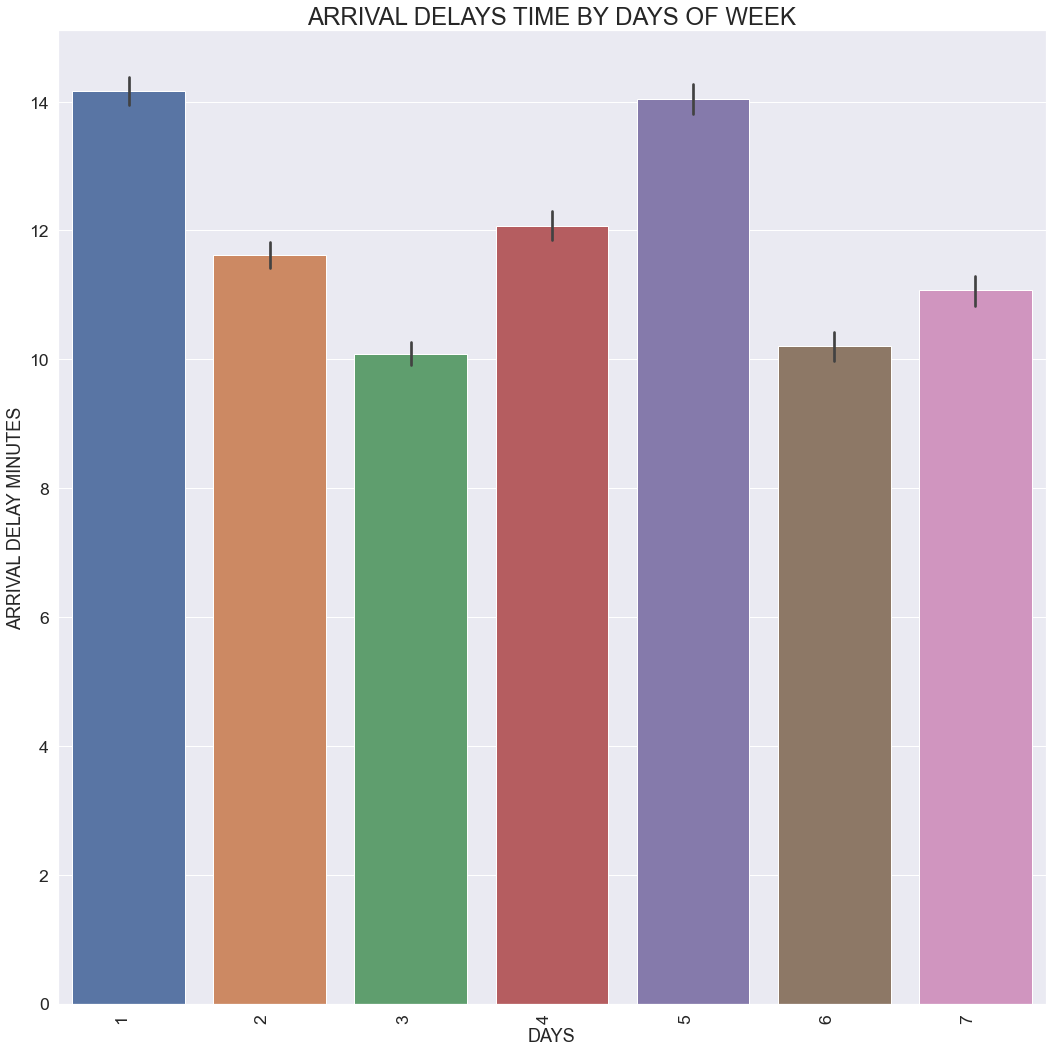

In [43]:
plt.figure(figsize=(15,15))
sns.set(font_scale=1.6)
axis = sns.barplot(x='DayOfWeek',y='ArrDelayMinutes', data=df, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('ARRIVAL DELAYS TIME BY DAYS OF WEEK', fontsize=24)
plt.xlabel('DAYS', fontsize=18)
plt.ylabel('ARRIVAL DELAY MINUTES', fontsize=18)
plt.tight_layout()
plt.show()

# DEPARTURE DELAYS TIME BY DAYS OF WEEK

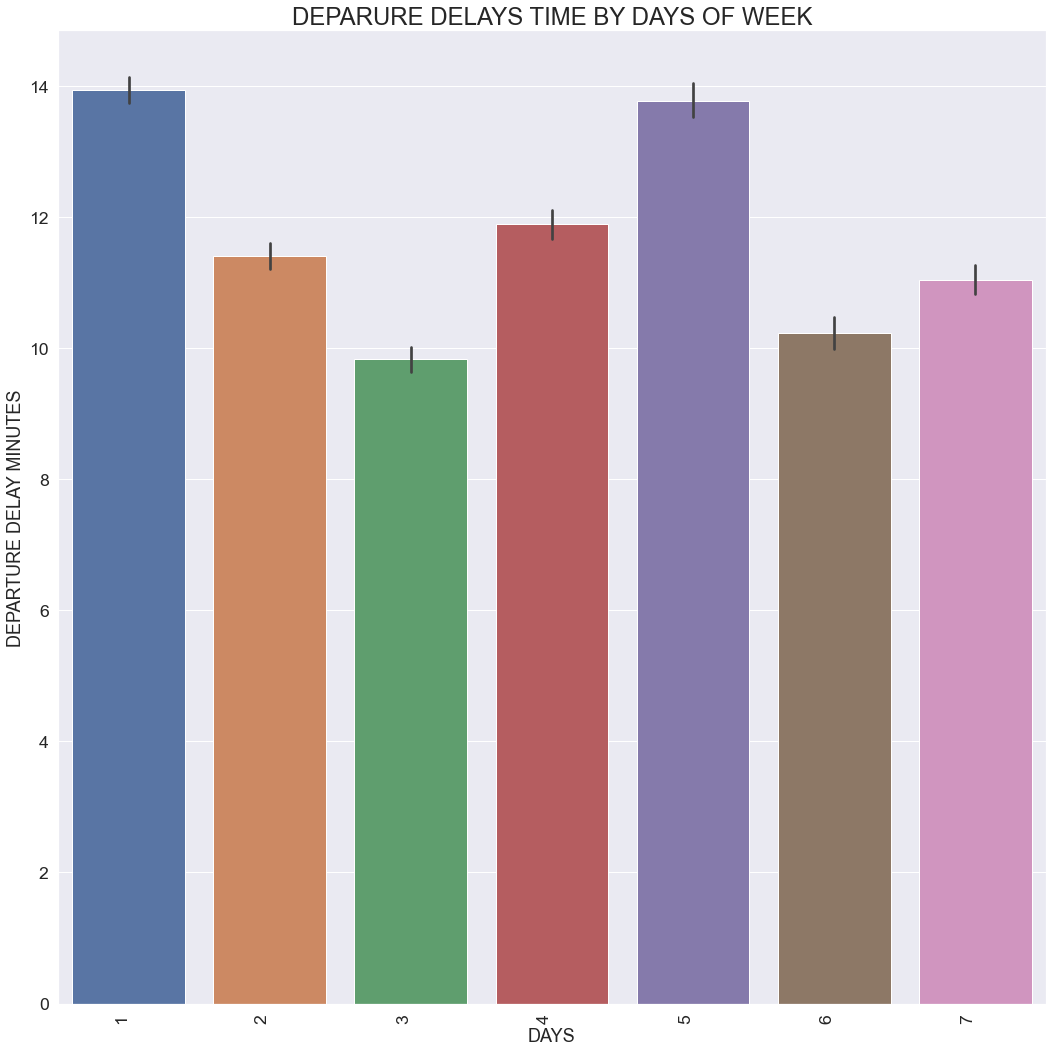

In [44]:
plt.figure(figsize=(15,15))
sns.set(font_scale=1.6)
axis = sns.barplot(x='DayOfWeek',y='DepDelayMinutes', data=df, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('DEPARURE DELAYS TIME BY DAYS OF WEEK', fontsize=24)
plt.xlabel('DAYS', fontsize=18)
plt.ylabel('DEPARTURE DELAY MINUTES', fontsize=18)
plt.tight_layout()
plt.show()

# COUNT THE NO OF DEPARTURE DELAY GROUPS

<AxesSubplot:xlabel='DepartureDelayGroups', ylabel='count'>

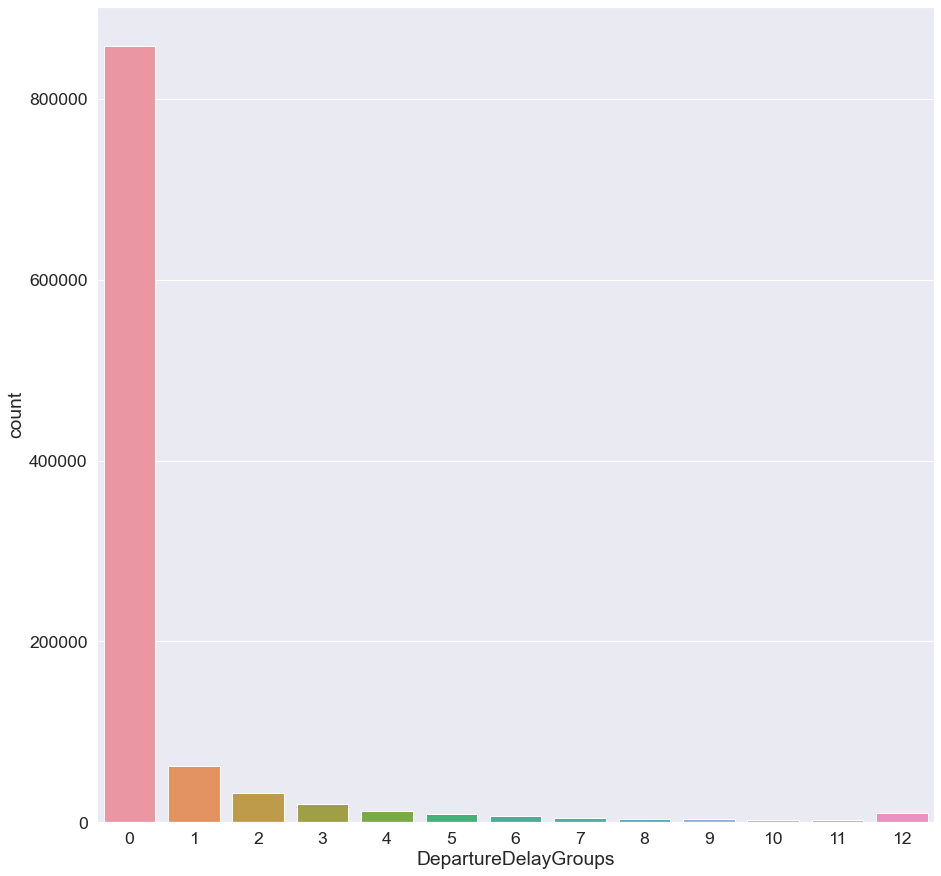

In [30]:
plt.figure(figsize=(15,15))
sns.countplot(x="DepartureDelayGroups",data=df)

# COUNT THE NO OF ARRIVAL DELAY GROUPS

<AxesSubplot:xlabel='ArrivalDelayGroups', ylabel='count'>

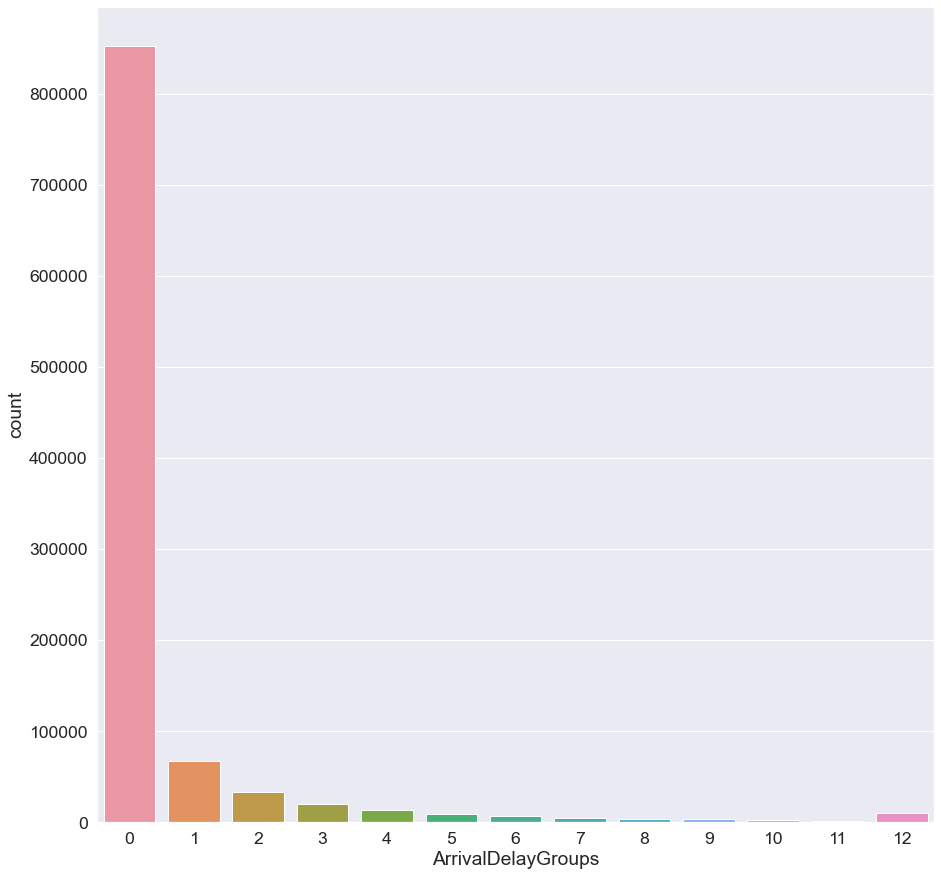

In [31]:
plt.figure(figsize=(15,15))
sns.countplot(x="ArrivalDelayGroups",data=df)

# DEPARTURE DELAY BY ORIGIN CITIES

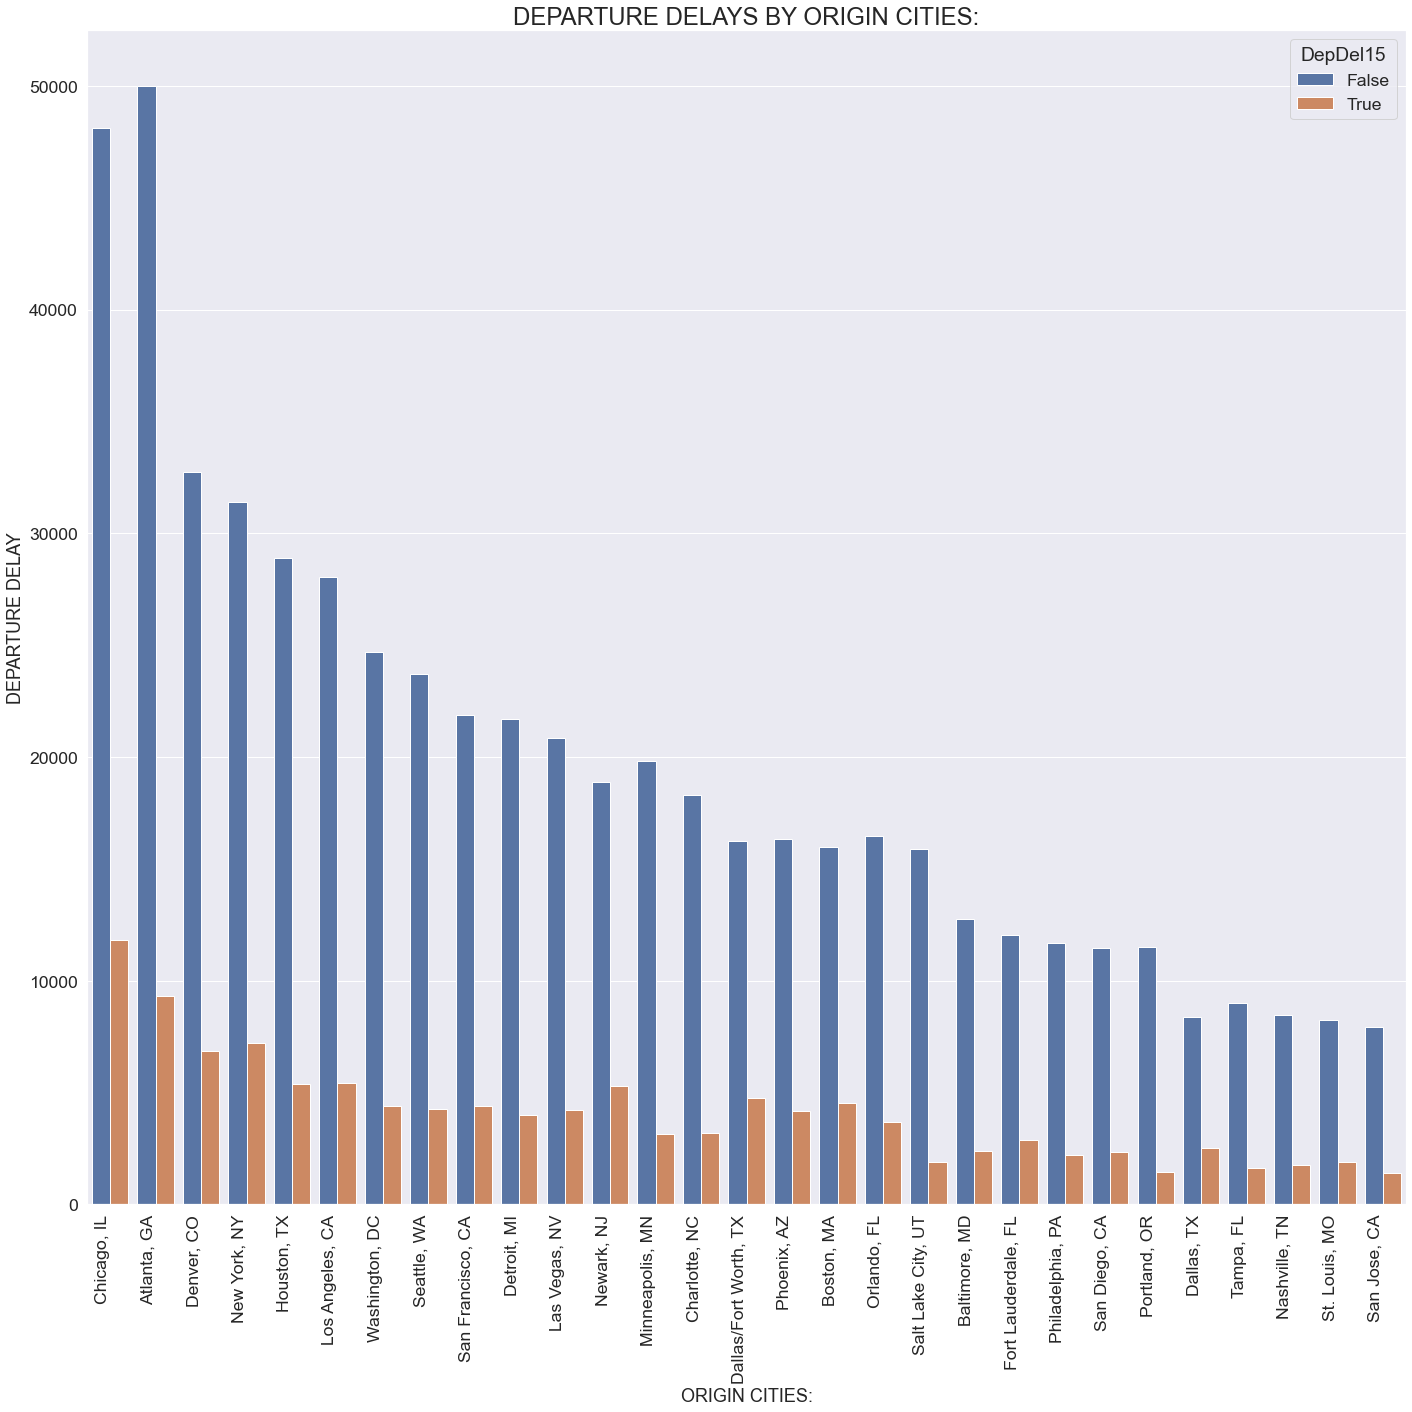

In [33]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.6)
axis = sns.countplot(x='OriginCityName',hue='DepDel15', data=df, order=df['OriginCityName'].value_counts().iloc[0:29].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('DEPARTURE DELAYS BY ORIGIN CITIES:', fontsize=24)
plt.xlabel('ORIGIN CITIES:', fontsize=18)
plt.ylabel('DEPARTURE DELAY', fontsize=18)
plt.tight_layout()
plt.show()

# ARRIVAL DELAY BY DESTINATION CITIES

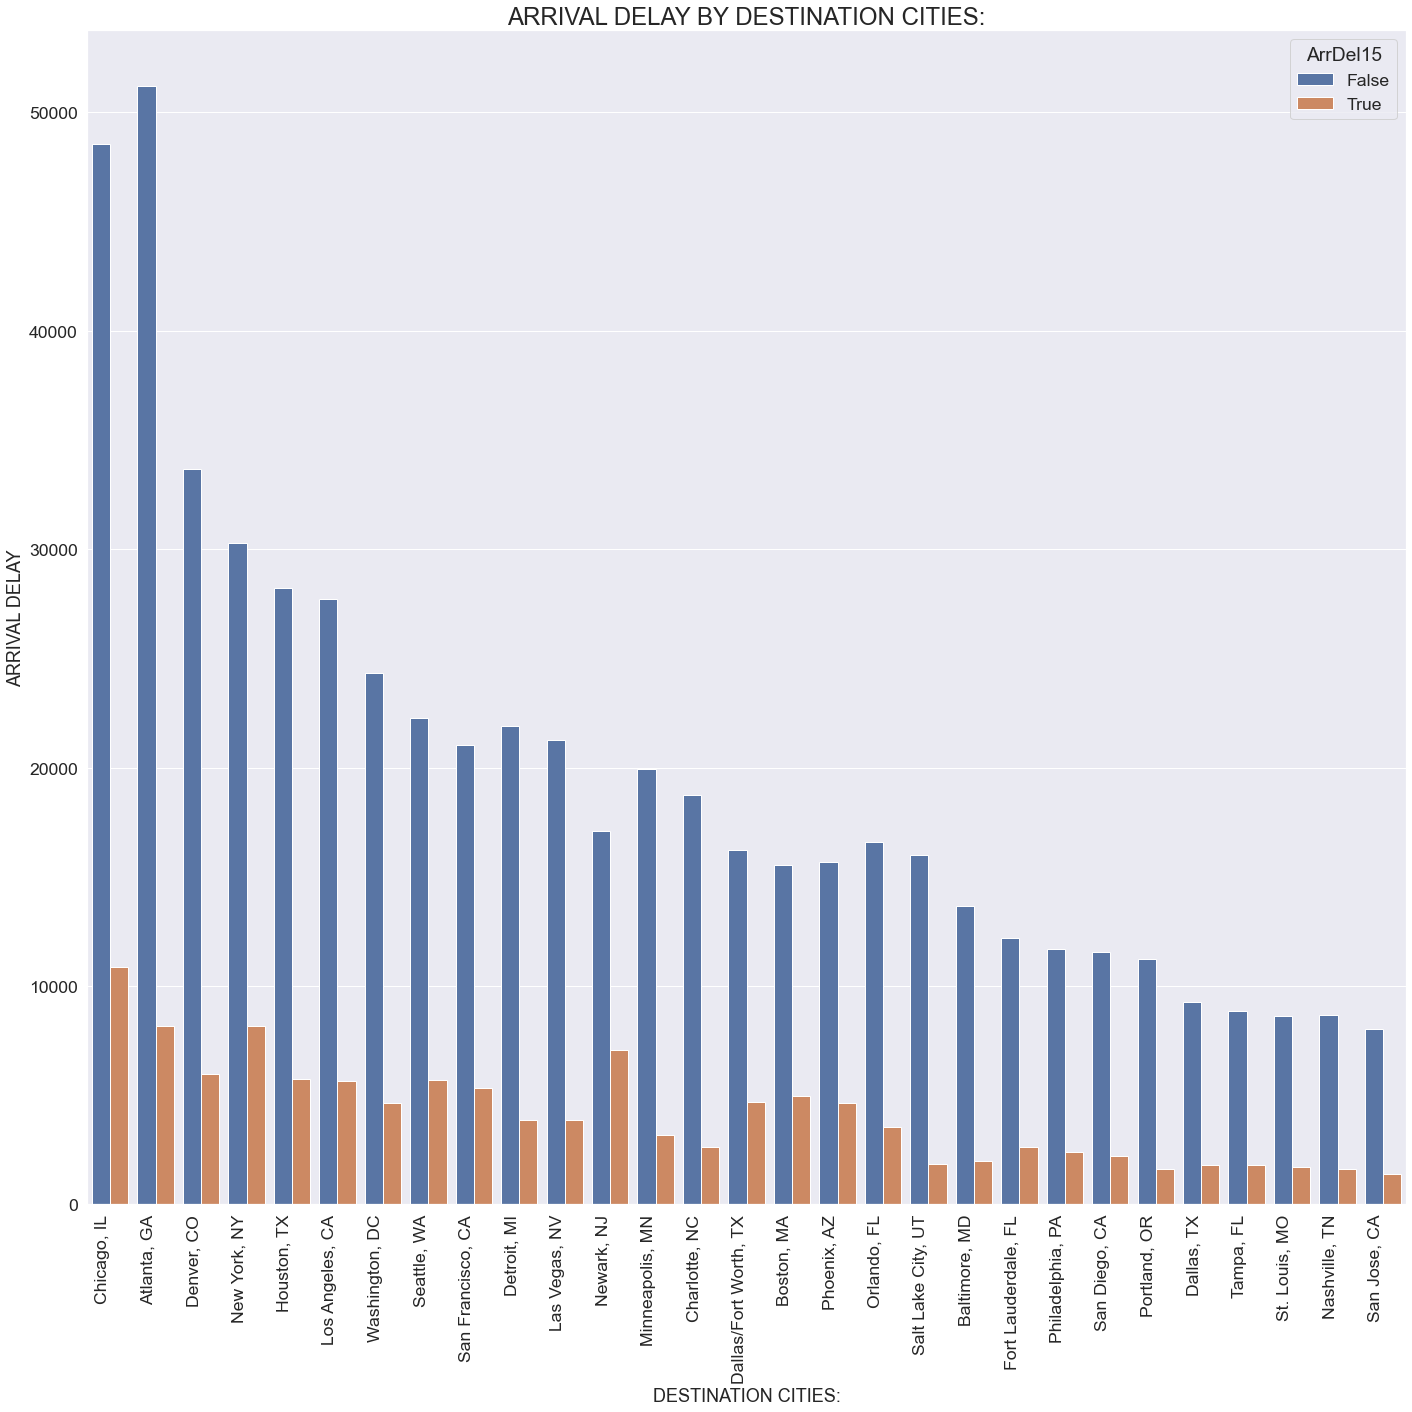

In [34]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.6)
axis = sns.countplot(x='DestCityName',hue='ArrDel15', data=df, order=df['DestCityName'].value_counts().iloc[0:29].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('ARRIVAL DELAY BY DESTINATION CITIES:', fontsize=24)
plt.xlabel('DESTINATION CITIES:', fontsize=18)
plt.ylabel('ARRIVAL DELAY', fontsize=18)
plt.tight_layout()
plt.show()

# ARRIVAL DELAYS BY MONTHS

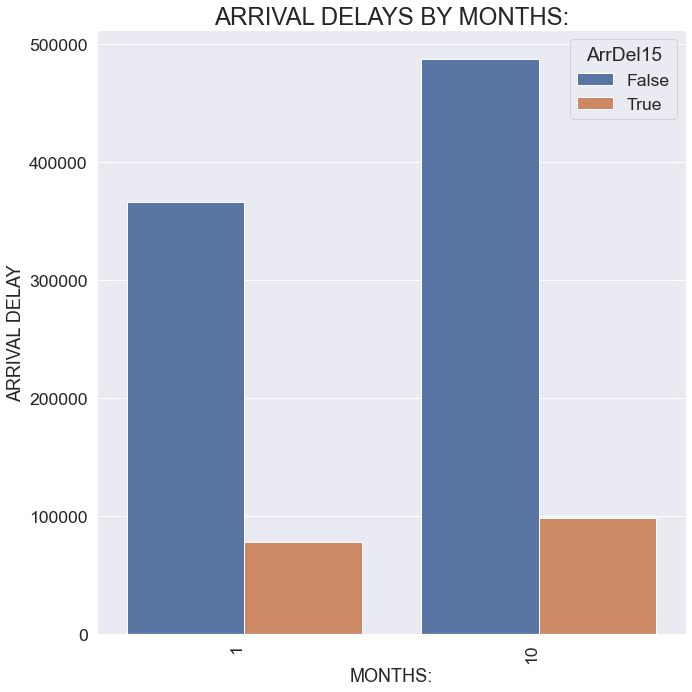

In [38]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.6)
axis = sns.countplot(x='Month',hue='ArrDel15', data=df, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('ARRIVAL DELAYS BY MONTHS:', fontsize=24)
plt.xlabel('MONTHS:', fontsize=18)
plt.ylabel('ARRIVAL DELAY', fontsize=18)
plt.tight_layout()
plt.show()

# DEPARTURE DELAYS BY MONTHS

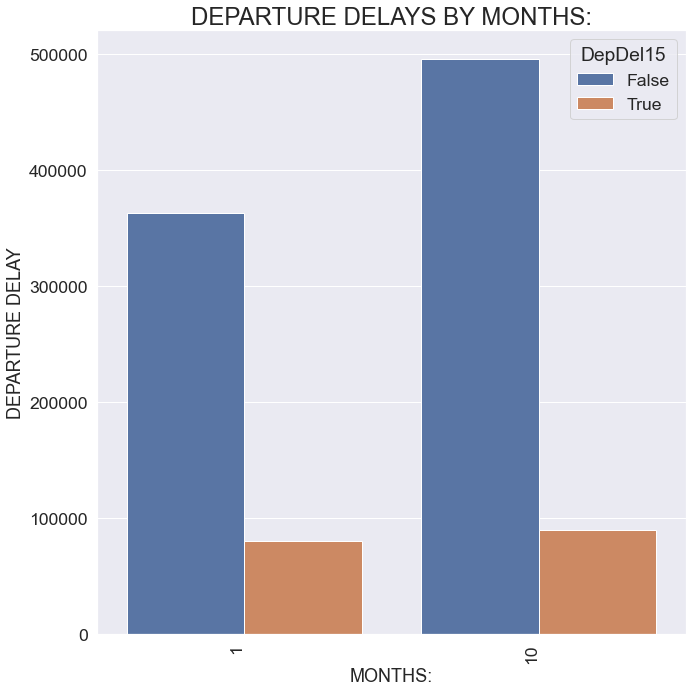

In [40]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.6)
axis = sns.countplot(x='Month',hue='DepDel15', data=df, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('DEPARTURE DELAYS BY MONTHS:', fontsize=24)
plt.xlabel('MONTHS:', fontsize=18)
plt.ylabel('DEPARTURE DELAY', fontsize=18)
plt.tight_layout()
plt.show()

# ARRIVAL DELAYS DISTANCE GROUP WISE

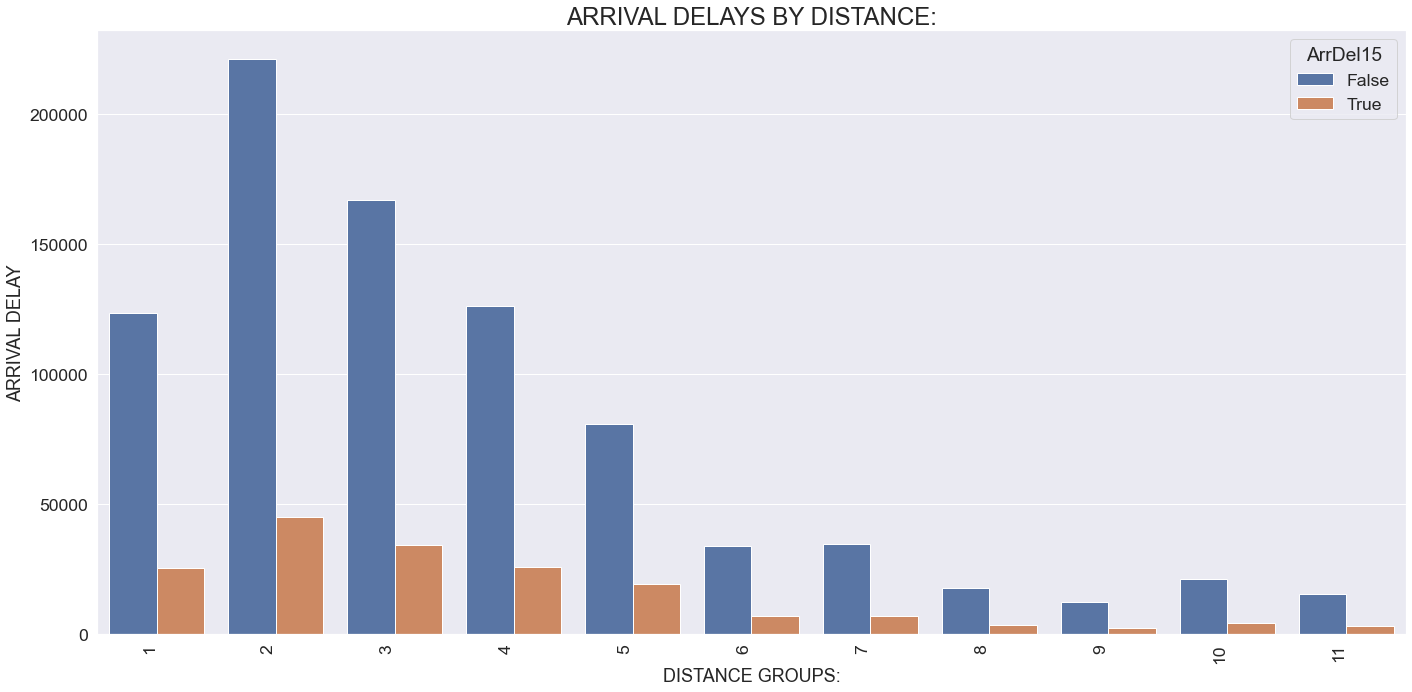

In [48]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.6)
axis = sns.countplot(x='DistanceGroup',hue='ArrDel15', data=df, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('ARRIVAL DELAYS BY DISTANCE:', fontsize=24)
plt.xlabel('DISTANCE GROUPS:', fontsize=18)
plt.ylabel('ARRIVAL DELAY', fontsize=18)
plt.tight_layout()
plt.show()

# DEPARTURE DELAYS DISTANCE GROUP WISE

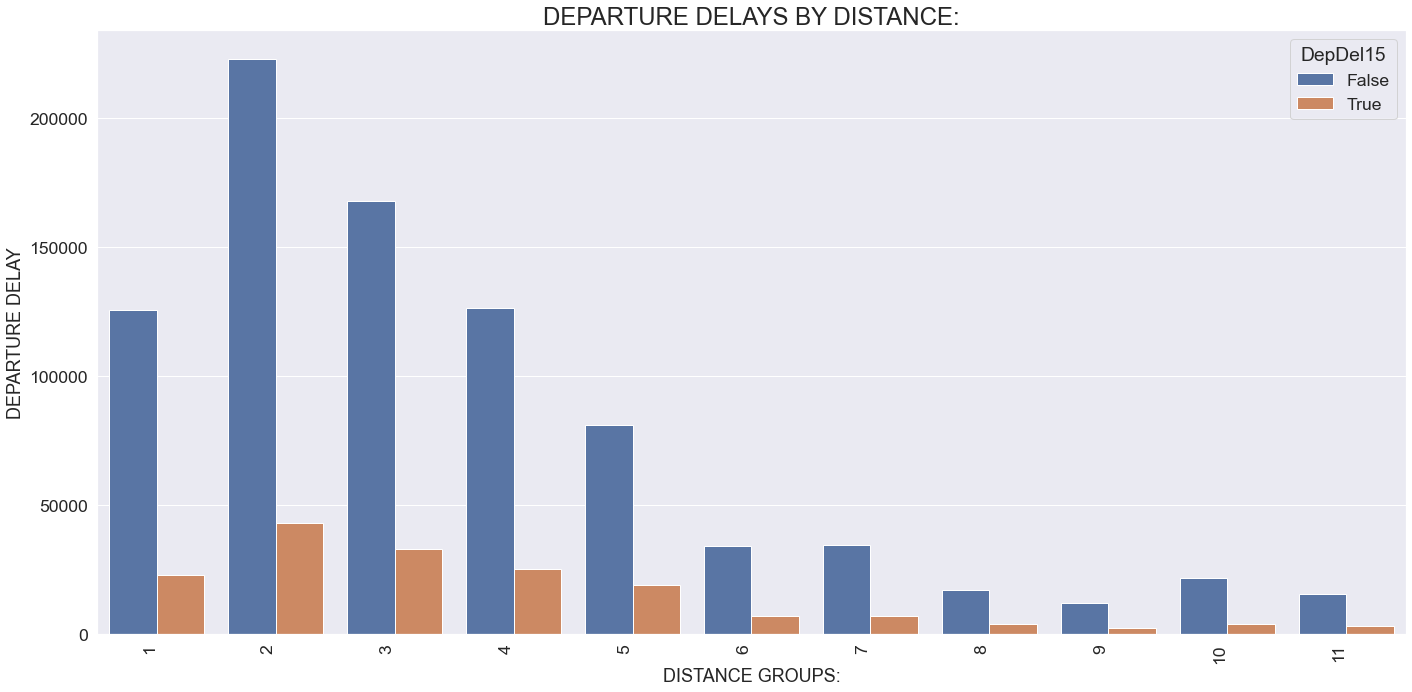

In [49]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.6)
axis = sns.countplot(x='DistanceGroup',hue='DepDel15', data=df, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('DEPARTURE DELAYS BY DISTANCE:', fontsize=24)
plt.xlabel('DISTANCE GROUPS:', fontsize=18)
plt.ylabel('DEPARTURE DELAY', fontsize=18)
plt.tight_layout()
plt.show()

# REGRESSION PLOT between Arrival Delay and Departure Delay in Minutes

<AxesSubplot:xlabel='ArrDelayMinutes', ylabel='DepDelayMinutes'>

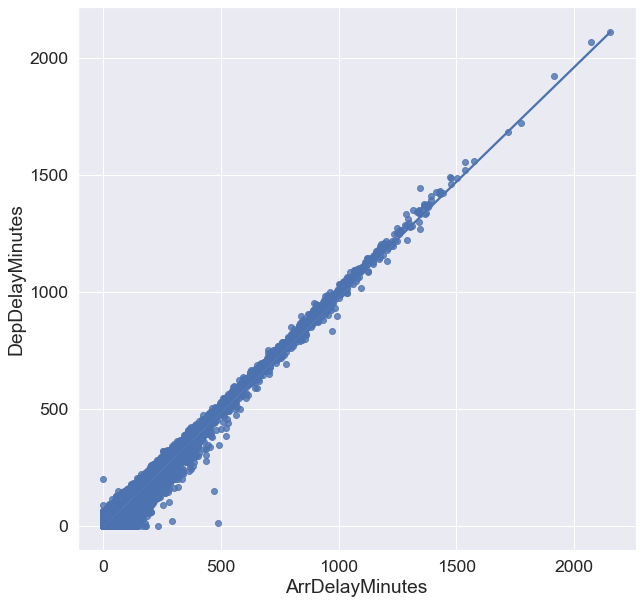

In [52]:
plt.figure(figsize=(10,10))
sns.regplot(x="ArrDelayMinutes",y="DepDelayMinutes",data=df)

# REGRESSION PLOT BETWEEN DISTANCE AND ARRIVAL DELAY IN MINUTES

<AxesSubplot:xlabel='Distance', ylabel='ArrDelayMinutes'>

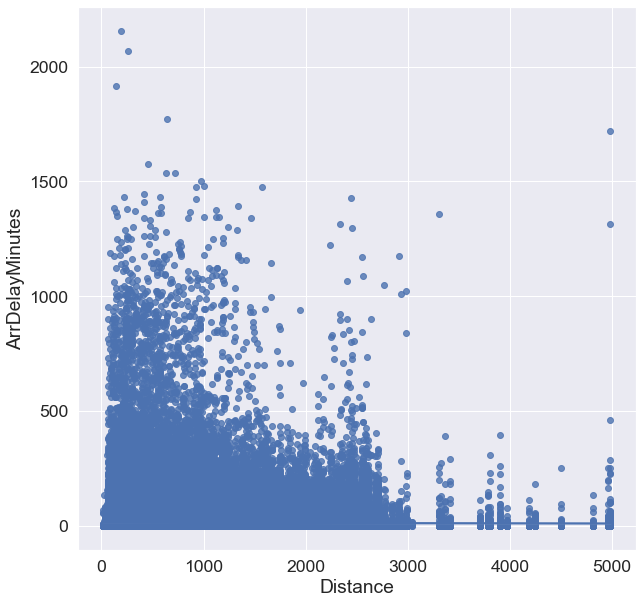

In [53]:
plt.figure(figsize=(10,10))
sns.regplot(x="Distance",y="ArrDelayMinutes",data=df)

# REGRESSION PLOT BETWEEN DISTANCE AND DEPARTURE DELAY IN MINUTES

<AxesSubplot:xlabel='Distance', ylabel='DepDelayMinutes'>

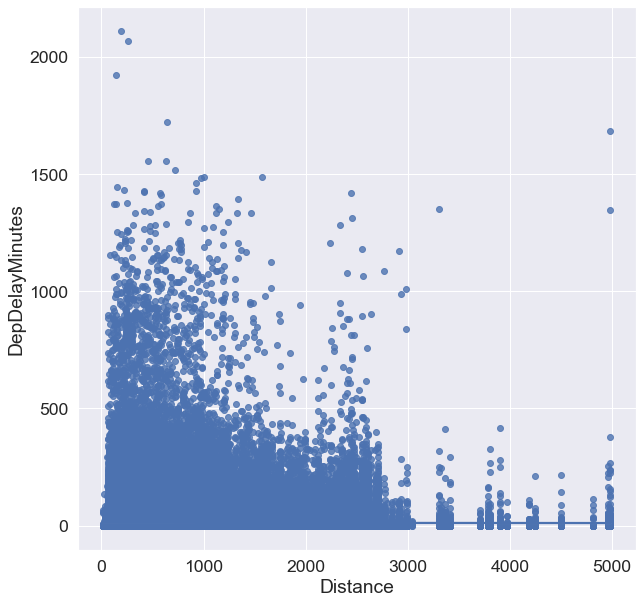

In [54]:
plt.figure(figsize=(10,10))
sns.regplot(x="Distance",y="DepDelayMinutes",data=df)